In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Load $(r,\mu)$ and Legendre matrices

In [49]:
work_dir = '/mnt/store1/oliverphilcox/Legendre2PCF/CovMatricesAll/'

In [133]:
c2l = np.loadtxt(work_dir+'c2_leg_n35_l10_11_full.txt')
c3l = np.loadtxt(work_dir+'c3_leg_n35_l10_1,11_full.txt')
c4l = np.loadtxt(work_dir+'c4_leg_n35_l10_11,11_full.txt')

In [134]:
c2f = np.diag(np.loadtxt(work_dir+'c2_n35_m10_11_full.txt'))
c3f = np.loadtxt(work_dir+'c3_n35_m10_1,11_full.txt')
c4f = np.loadtxt(work_dir+'c4_n35_m10_11,11_full.txt')

In [135]:
cl_tot = c2l+c3l+c4l
cf_tot = c2f+c3f+c4f

#### Find Legendre approximation from $(r,\mu)$ matrix

In [136]:
from scipy.special import legendre

In [137]:
mu_cen = np.arange(0.05,1.05,0.1)
n=35
m=10

In [138]:
l_bins=6
cf_legendre = np.zeros_like(cl_tot)
for p_i in range(l_bins):
    legendre_p = p_i*2
    for q_i in range(l_bins):
        legendre_q = q_i*2
        all_factors = np.matmul(legendre(legendre_p)(mu_cen).reshape(-1,1),legendre(legendre_q)(mu_cen).reshape(1,-1))
        for r_a in range(n):
            for r_b in range(n):
                this_cov = cf_tot[m*r_a:m*(r_a+1),m*r_b:m*(r_b+1)]
                cf_legendre[r_a*l_bins+p_i,r_b*l_bins+q_i]=np.sum(all_factors*this_cov)*(1./m)**2.*(2.*legendre_p+1)*(2.*legendre_q+1)

In [139]:
ind_cov_full_legendre=[]
for i in range(l_bins):
    ind_cov_full_legendre.append(cf_legendre[i::l_bins,i::l_bins])

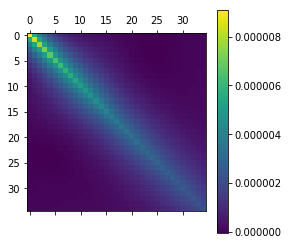

In [140]:
plt.matshow(ind_cov_full_legendre[2]);plt.colorbar();

In [141]:
ind_cov_legendre=[]
for i in range(l_bins):
    ind_cov_legendre.append(cl_tot[i::l_bins,i::l_bins])

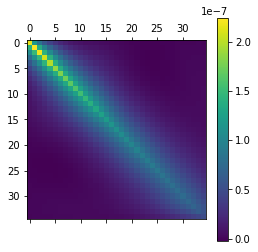

In [142]:
plt.matshow(ind_cov_legendre[2]);plt.colorbar()

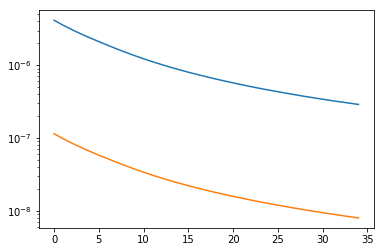

In [176]:
plt.plot(np.diag(ind_cov_full_legendre[0]),label='Full Matrix')
plt.plot(np.diag(ind_cov_legendre[0]),label='Legendre Matrix')
plt.yscale('log')

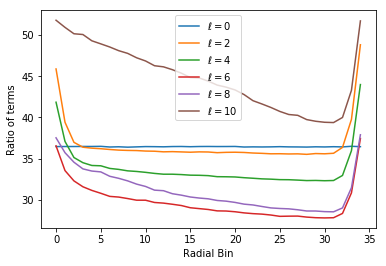

In [177]:
for i in range(6):
    plt.plot(np.diag(ind_cov_full_legendre[i])/np.diag(ind_cov_legendre[i]),label=r'$\ell = %d$'%(2*i))
plt.ylabel('Ratio of terms')
plt.xlabel('Radial Bin');
plt.legend();

#### Display matrix in other ordering;

In [149]:
cl_tot_reordered = np.zeros_like(cl_tot)
for r_a in range(n):
    for r_b in range(n):
        for p_i in range(l_bins):
            for q_i in range(l_bins):
                cl_tot_reordered[p_i*n+r_a,q_i*n+r_b]=cf_legendre[r_a*l_bins+p_i,r_b*l_bins+q_i]

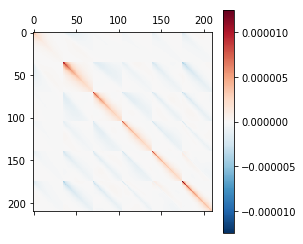

In [150]:
vmax=max(cl_tot_reordered.ravel())
plt.matshow(cl_tot_reordered,cmap=cm.RdBu_r,vmax=vmax,vmin=-vmax);plt.colorbar();

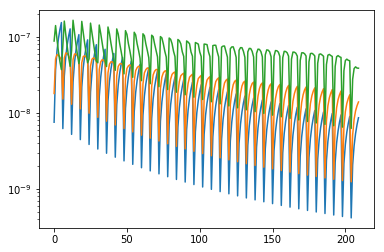

In [152]:
plt.plot(np.diag(c2l))
plt.plot(np.diag(c3l))
plt.plot(np.diag(c4l))
plt.yscale('log');